In [2]:
classes = ['CALsuburb', 'MIThighway', 'MITopencountry', 'PARoffice', 'livingroom', \
            'MITcoast', 'MITinsidecity', 'MITstreet', 'bedroom', \
            'MITforest', 'MITmountain', 'MITtallbuilding', 'kitchen']
import numpy as np
import os
import collections
import csv

In [13]:
np_greyscale_filename = "features/13Scenes-greyscale.npy"
np_labels_filename = "features/labels.npy"
greyscale_matrix = np.load(np_greyscale_filename)
n = len(greyscale_matrix)
p = len(greyscale_matrix[0])
print "size of greyscale is ", greyscale_matrix.shape

greyscale_labels = np.load(np_labels_filename)
print "size of labels is ", greyscale_labels.shape
greyscale_labels = np.expand_dims(greyscale_labels, axis=1)
print "after resized", greyscale_labels.shape

size of greyscale is  (3859, 66420)
size of labels is  (3859,)
after resized (3859, 1)


# Split train and test 80:20

In [20]:
# random seed set

from sklearn.cross_validation import StratifiedKFold

num_folds = 5
rand_seed = 123
train_indices_filename = "features/train_indices"
test_indices_filename = "features/test_indices"
X_train_filename = "features/X_train"
y_train_filename = "features/y_train"
X_test_filename = "features/X_test"
y_test_filename = "features/y_test"


train, test = next(iter(StratifiedKFold(greyscale_labels.flatten(), n_folds=num_folds, random_state=rand_seed)))

print len(train), len(test)

np.save(train_indices_filename, train)
np.save(test_indices_filename, test)

X_train, y_train = greyscale_matrix[train], greyscale_labels[train]
X_test, y_test = greyscale_matrix[test], greyscale_labels[test]

print X_train.shape, y_train.shape, X_test.shape, y_test.shape


np.save(X_train_filename, X_train)
np.save(y_train_filename, y_train)
np.save(X_test_filename, X_test)
np.save(y_test_filename, y_test)


 3083 776
(3083, 66420) (3083, 1) (776, 66420) (776, 1)


In [3]:
X_train = np.load("features/X_train.npy")
X_test = np.load("features/X_test.npy")
y_train = np.load("features/y_train.npy")
y_test = np.load("features/y_test.npy")
print X_train.shape
print X_test.shape

(3083, 66420)
(776, 66420)


# Do PCA over train, save train, and test, and model

In [23]:
from sklearn.decomposition import PCA
import pickle
import csv

# comp_list = [500]
# for comp in comp_list:
#     pca = PCA(n_components=comp)
#     print "Fitting PCA..."
#     %time pca.fit(X_train)
#     print "Transforming PCA..."
#     %time new_X_train= pca.transform(X_train)
#     %time new_X_test = pca.transform(X_test)
    
#     feature_name = "greyscale-pca-" + str(comp) +'-'
#     out_train_file_name = "features/X_train-" + feature_name
#     out_test_file_name = "features/X_test-" + feature_name
#     out_model_file_name = "features/model-" + feature_name + '.p'
#     out_model_component_file_name = "features/model-components-" + feature_name
#     out_model_variance_file_name = "features/model-variance-" + feature_name
    
#     np.save(out_train_file_name, new_X_train)
#     np.save(out_test_file_name, new_X_test)
pickle.dump(pca, open(out_model_file_name, 'wb'))
components = pca.components_
np.save(out_model_component_file_name,components)
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
np.save(out_model_variance_file_name, var)


print "Training saved to ", out_train_file_name + ".npy"
print "Test saved to ", out_test_file_name + ".npy"
print "Model saved to ", out_model_file_name
print "Model components saved to ", out_model_component_file_name + ".npy"
print "Variance saved to ", out_model_variance_file_name + ".npy"    

os.system("say 'finished writing pca'")
# Save variance

print "For comp, ", comp, "Variance explained is ", var


    



Training saved to  features/X_train-greyscale-pca-500-.npy
Test saved to  features/X_test-greyscale-pca-500-.npy
Model saved to  features/model-greyscale-pca-500-.p
Model components saved to  features/model-components-greyscale-pca-500-.npy
Variance saved to  features/model-variance-greyscale-pca-500-.npy
For comp,  500 Variance explained is  [ 19.95  33.35  40.08  45.08  48.41  51.25  53.25  54.99  56.37  57.65
  58.79  59.87  60.84  61.72  62.47  63.22  63.83  64.4   64.94  65.47
  65.99  66.49  66.96  67.4   67.83  68.22  68.58  68.92  69.25  69.56
  69.87  70.16  70.45  70.73  71.    71.26  71.5   71.74  71.97  72.19
  72.41  72.62  72.83  73.03  73.22  73.41  73.6   73.78  73.96  74.13
  74.3   74.47  74.63  74.79  74.95  75.1   75.24  75.38  75.52  75.66
  75.79  75.92  76.05  76.18  76.3   76.42  76.54  76.66  76.78  76.89  77.
  77.11  77.22  77.33  77.43  77.53  77.63  77.73  77.83  77.93  78.03
  78.12  78.21  78.3   78.39  78.48  78.57  78.66  78.75  78.84  78.92  79.
  79.0

In [38]:
print new_X_train.shape, new_X_test.shape
print new_X_train[:,0]
print new_X_train[:,1]

(3083, 500) (776, 500)
[-11475.40266984  -9339.96170656  -7470.10298822 ...,  -4196.14467449
   2970.74597155   3340.47557792]
[  512.34700911  -274.55117527  4550.59710521 ...,  1332.79448007
  -161.43770388 -3309.29216117]


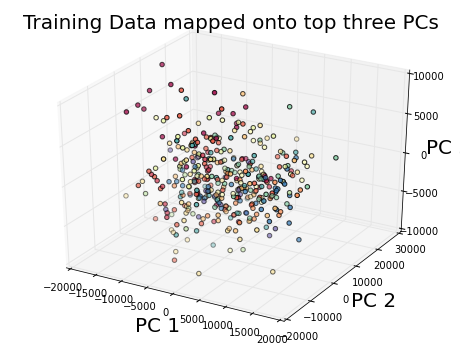

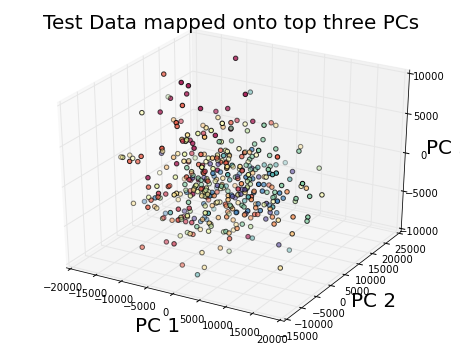

In [76]:
# Sanity check to see how the PCA is doing

# plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm




fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


sample_size = 400
rand_seed = 123
np.random.seed(rand_seed)
random_indices = np.random.choice(len(new_X_train), size=sample_size, replace=False)

xs = new_X_train[random_indices, 0]
ys = new_X_train[random_indices, 1]
zs = new_X_train[random_indices, 2]
labels = (y_train[random_indices]).flatten()

label_set = set(list(labels))



ax.scatter(xs=xs, ys=ys, zs=zs, c=labels, cmap=cm.Spectral)
ax.set_xlabel("PC 1", fontsize=20)
ax.set_ylabel("PC 2", fontsize=20)
ax.set_zlabel("PC 3", fontsize=20)
ax.set_xlim(-20000, 20000)
ax.set_zlim(-10000, 10000)
plt.legend(loc='best')
plt.title("Training Data mapped onto top three PCs", fontsize=20)
plt.show()

# plax.scatter(xs=xs, ys=ys, zs=zs, c=labels, cmap=cm.Spectral)


sample_size = 400
rand_seed = 123
np.random.seed(rand_seed)
random_indices = np.random.choice(len(new_X_test), size=sample_size, replace=False)

xs = new_X_test[random_indices, 0]
ys = new_X_test[random_indices, 1]
zs = new_X_test[random_indices, 2]
labels = (y_test[random_indices]).flatten()


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=xs, ys=ys, zs=zs, c=labels, cmap=cm.Spectral)
ax.set_xlabel("PC 1", fontsize=20)
ax.set_ylabel("PC 2", fontsize=20)
ax.set_zlabel("PC 3", fontsize=20)
ax.set_xlim(-20000, 20000)
ax.set_zlim(-10000, 10000)
plt.legend(loc='best')
plt.title("Test Data mapped onto top three PCs", fontsize=20)
plt.show()

# check inverse transform


In [89]:
print y_train.flatten().shape
print np.where(y_train.flatten() == 0)
print new_X_train[np.where(y_train.flatten() == 0), 0]

(3083,)
(array([172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223,
       224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,
       237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249,
       250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,
       263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275,
       276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288,
       289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301,
       302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314,
       315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327,
       328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350

In [ ]:
# Maake some violin plots of each class along the PCs

new_X_train_seg_0 = [new_X_train[np.where(y_train.flatten() == i),0][0] for i in range(13)]

new_X_train_seg_1 = np.array([new_X_train[np.where(y_train.flatten() == i),1][0] for i in range(13)])
new_X_train_seg_2 = np.array([new_X_train[np.where(y_train.flatten() == i),2][0] for i in range(13)])

labels = range(13)

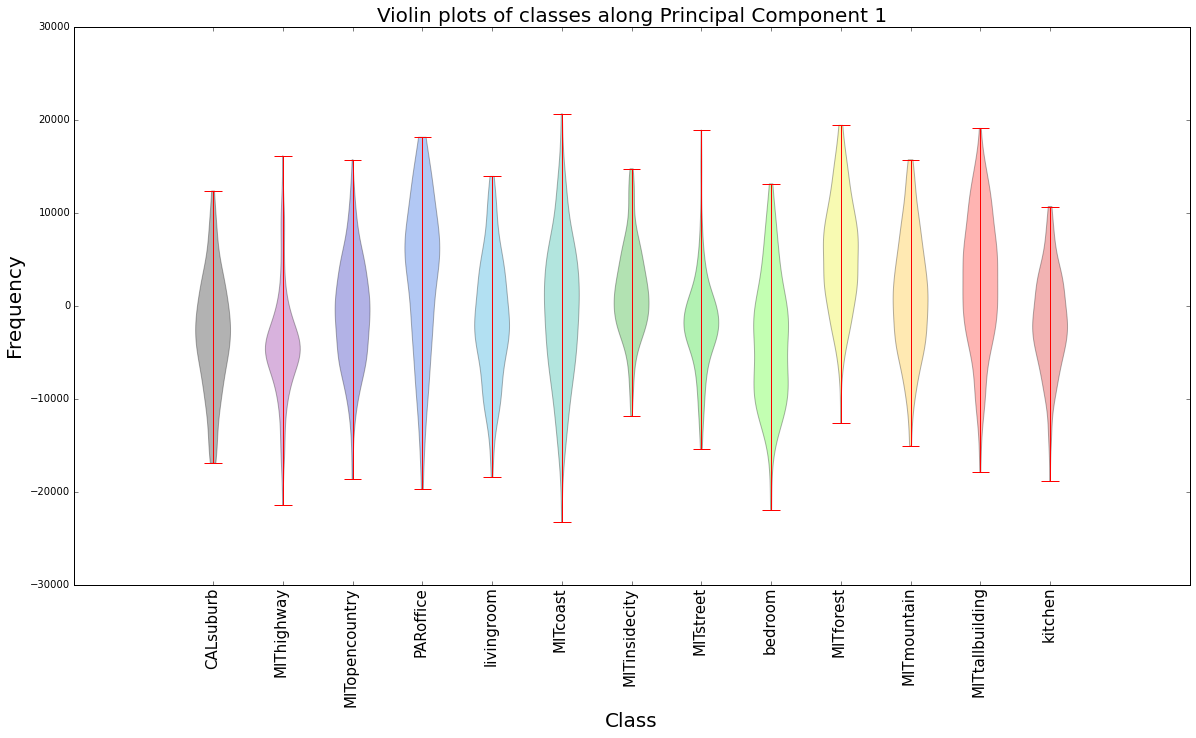

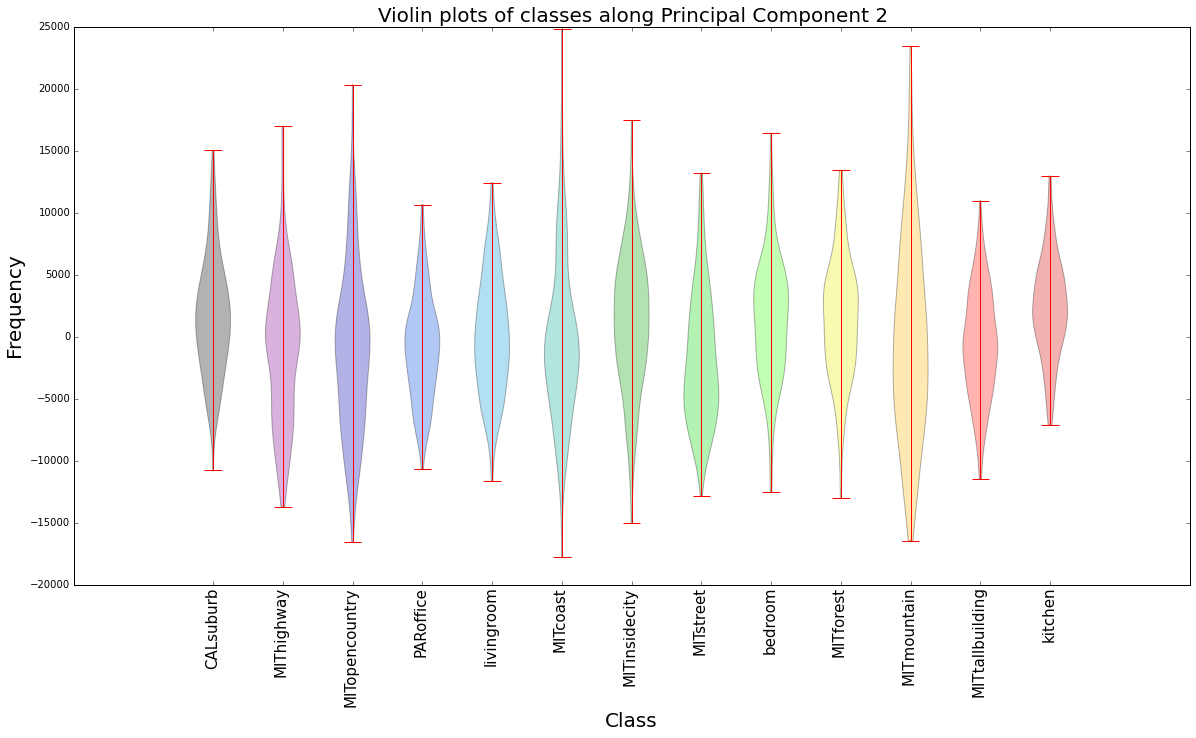

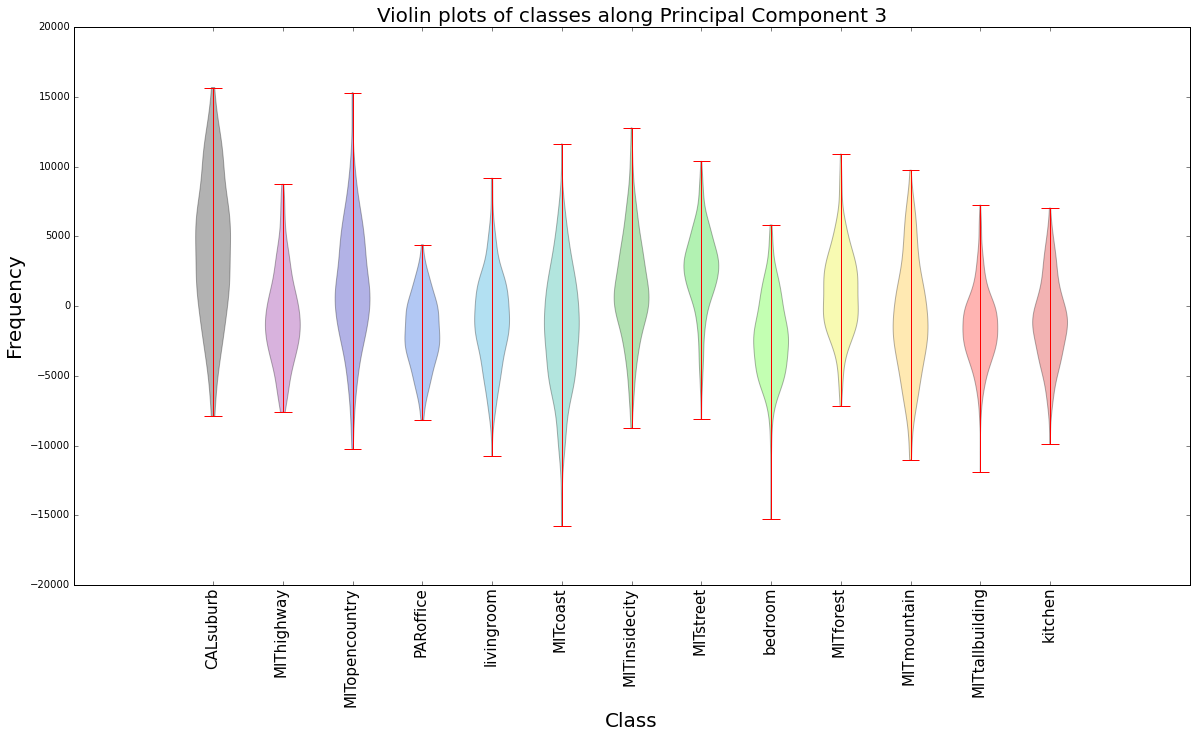

In [112]:


plt.figure(figsize=(20,10))
violin_parts = plt.violinplot(new_X_train_seg_0, positions=labels)
for i in range(len(violin_parts['bodies'])):
    pc = violin_parts['bodies'][i]
    pc.set_facecolor(cm.spectral(i * 1.0 / len(labels)))

plt.xlabel("Class", fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.title("Violin plots of classes along Principal Component 1", fontsize=20)
plt.xticks(labels, classes, rotation='vertical', fontsize=15)
plt.show()

plt.figure(figsize=(20,10))
violin_parts = plt.violinplot(new_X_train_seg_1, positions=labels)
for i in range(len(violin_parts['bodies'])):
    pc = violin_parts['bodies'][i]
    pc.set_facecolor(cm.spectral(i * 1.0 / len(labels)))
plt.xlabel("Class", fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.title("Violin plots of classes along Principal Component 2", fontsize=20)
plt.xticks(labels, classes, rotation='vertical', fontsize=15)
plt.show()

plt.figure(figsize=(20,10))
violin_parts = plt.violinplot(new_X_train_seg_2, positions=labels)
for i in range(len(violin_parts['bodies'])):
    pc = violin_parts['bodies'][i]
    pc.set_facecolor(cm.spectral(i * 1.0 / len(labels)))
plt.xlabel("Class", fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.title("Violin plots of classes along Principal Component 3", fontsize=20)
plt.xticks(labels, classes, rotation='vertical', fontsize=15)
plt.show()

# Do NMF over train, save train, and test, and model

In [211]:
from sklearn.decomposition import NMF, TruncatedSVD
import csv
import pickle
import os

comp_list = [10, 20, 50, 100, 500]
tols = [20.0, 1.0, 0.01, 1e-3, 1e-4]
random_state = 123

for tol in tols:
    for comp in comp_list:
        nmf = NMF(n_components=comp, random_state=random_state, tol=tol)
        print "Fitting nmf..."
        %time nmf.fit(X_train)
        print "Transforming nmf..."
        %time new_X_train= nmf.transform(X_train)
        %time new_X_test = nmf.transform(X_test)

        feature_name = "greyscale-nmf-" + str(comp) +'-tol' + str(tol)
        out_train_file_name = "features/X_train-" + feature_name
        out_test_file_name = "features/X_test-" + feature_name
        out_model_file_name = "features/model-" + feature_name + '.p'
        out_model_component_file_name = "features/model-components-" + feature_name
        out_model_error_file_name = "features/model-error-" + feature_name

        np.save(out_train_file_name, new_X_train)
        np.save(out_test_file_name, new_X_test)
        pickle.dump(nmf, open(out_model_file_name, 'wb'))
        components = nmf.components_
        np.save(out_model_component_file_name,components)
        err = np.array(nmf.reconstruction_err_)
        np.save(out_model_error_file_name, err)




        print "Training saved to ", out_train_file_name + ".npy"
        print "Test saved to ", out_test_file_name + ".npy"
        print "Model saved to ", out_model_file_name
        print "Model components saved to ", out_model_component_file_name + ".npy"
        print "Error saved to ", out_model_error_file_name + ".npy"    

        print "For comp, ", comp, "VREconstruction error e explained is ",err
        print "Average error per image ", err/len(X_train)
        print "Average error per image pixel ",  err/(len(X_train) * len(X_train[0]))


        os.system("say 'finished writing nmf'")
    # Save variance


Fitting nmf...
CPU times: user 12.2 s, sys: 25.7 s, total: 37.9 s
Wall time: 1min 50s
Transforming nmf...
CPU times: user 47.7 s, sys: 8.4 s, total: 56.1 s
Wall time: 1min 2s
CPU times: user 11.9 s, sys: 2.21 s, total: 14.1 s
Wall time: 15.8 s
Training saved to  features/X_train-greyscale-nmf-10-tol20.0.npy
Test saved to  features/X_test-greyscale-nmf-10-tol20.0.npy
Model saved to  features/model-greyscale-nmf-10-tol20.0.p
Model components saved to  features/model-components-greyscale-nmf-10-tol20.0.npy
Error saved to  features/model-error-greyscale-nmf-10-tol20.0.npy
For comp,  10 VREconstruction error e explained is  786007.963775
Average error per image  254.949063826
Average error per image pixel  0.00383843817865
Fitting nmf...
CPU times: user 13.5 s, sys: 21.7 s, total: 35.2 s
Wall time: 1min 23s
Transforming nmf...
CPU times: user 2min 17s, sys: 10.7 s, total: 2min 27s
Wall time: 2min 32s
CPU times: user 35 s, sys: 3.03 s, total: 38 s
Wall time: 39.6 s
Training saved to  feature

KeyboardInterrupt: 

# Do isomap over train, save train, and test, and model

In [ ]:
from sklearn.manifold import Isomap
import csv
import pickle
import os


random_state = 123
comp_list = [2, 3, 4]
neigh_list = [5, 10, 50]
for neigh in neigh_list:
    for comp in comp_list:
        iso = Isomap(n_components=comp, n_neighbors = neigh)
        print "Fitting iso..."
        %time iso.fit(X_train)
        print "Transforming iso..."
        %time new_X_train= iso.transform(X_train)
        %time new_X_test = iso.transform(X_test)

        feature_name = "greyscale-iso-" + str(comp) +'-'+ str(neigh) + '-'
        out_train_file_name = "features/X_train-" + feature_name
        out_test_file_name = "features/X_test-" + feature_name
        out_model_file_name = "features/model-" + feature_name + '.p'
        out_model_component_file_name = "features/model-components-" + feature_name
        out_model_error_file_name = "features/model-error-" + feature_name

        np.save(out_train_file_name, new_X_train)
        np.save(out_test_file_name, new_X_test)
        pickle.dump(iso, open(out_model_file_name, 'wb'))
        embedding = iso.embedding_
        np.save(out_model_component_file_name,embedding)        
        err = np.array(iso.reconstruction_error())
        np.save(out_model_error_file_name, err)

        print "Training saved to ", out_train_file_name + ".npy"
        print "Test saved to ", out_test_file_name + ".npy"
        print "Model saved to ", out_model_file_name
        print "Model components saved to ", out_model_component_file_name + ".npy"
        print "Error saved to ", out_model_error_file_name + ".npy"    

        print "For neighbors, ", neigh
        print "For comp, ", comp, "VREconstruction error e explained is ",err
        print "Average error per image ", err/len(X_train)
        print "Average error per image pixel ",  err/(len(X_train) * len(X_train[0]))


        os.system("say 'finished writing iso'")



Fitting iso...


In [ ]:
# Create train and test indices

from sklearn.cross_validation import StratifiedKFold

num_folds = 5
rand_seed = 123
train_indices, test_indices = next(iter(StratifiedKFold(greyscale_labels.flatten(), n_folds=num_folds, random_state=rand_seed)))

In [163]:
import csv
import pandas as pd



def load_csv_formatted(csvfile):
    """load csv file according to the format we specified in sharelatex
    assume each row is a sample
    assume each column is feature
    return X, y, featurename
    """


    df = pd.read_csv(csvfile)
    matr = df[df.keys()[4:]]
    feature_name = df.keys()[4][:-1]
    
    X = matr.as_matrix()
    labels = df['Class_Label']
    y = labels.as_matrix()
    length = y.shape[0]
    
    return X, y, feature_name

            

In [ ]:
# Load the sample pca you have
# Run with X and y


# Classification Code

In [ ]:
# load the data as npy
# Load the labels

# make a bunch of classifiers

from sklearn.cross_validation import StratifiedKFold
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import time

!mkdir "results"
outfile = 'results/classification_results.csv'
results = []

# CLASSIFICATION PARAMETERS
svcrbf = OneVsRestClassifier(svm.SVC())
lsvc = OneVsRestClassifier(svm.LinearSVC())

maxLearners = 100
maxDepths = [10]
dts = [DecisionTreeClassifier(max_depth = maxDepth) for maxDepth in maxDepths]
dt1s = [OneVsRestClassifier(DecisionTreeClassifier(max_depth = maxDepth)) for maxDepth in maxDepths]
rfs = [RandomForestClassifier(n_estimators = maxLearners, max_depth = maxDepth, warm_start = False) for maxDepth in maxDepths]
rf1s = [OneVsRestClassifier(RandomForestClassifier(n_estimators = maxLearners, max_depth = maxDepth, warm_start = False)) for maxDepth in maxDepths]

neighbors = [5]
knns = [OneVsRestClassifier(KNeighborsClassifier(n_neighbors = n)) for n in neighbors]

gnb = GaussianNB()

# gnb1 = OneVsRestClassifier(GaussianNB())

# mnb = MultinomialNB()

# mnb1 = OneVsRestClassifier(MultinomialNB())

lr = OneVsRestClassifier(LogisticRegression())

# ab = AdaBoostClassifier()
ab1 = OneVsRestClassifier(AdaBoostClassifier())

dummy = DummyClassifier()
dummy1 = OneVsRestClassifier(DummyClassifier())



print ("SVC RBF")
results.append(train(svcrbf, X_train, X_test, y_train, y_test))

print ("LSVC")
results.append(train(lsvc,X_train, X_test, y_train, y_test))

for dt in dts:
    print ("DT")
    results.append(train(dt, X_train, X_test, y_train, y_test))

for dt1 in dt1s:
    print ("DT1")
    results.append(train(dt1, X_train, X_test, y_train, y_test))
    
for rf in rfs:
    print ("RF")
    results.append(train(rf, X_train, X_test, y_train, y_test))
    
for rf1 in rf1s:
    print ("RF1")
    results.append(train(rf1, X_train, X_test, y_train, y_test))

for knn in knns:
    print ("KNN")
    results.append(train(knn, X_train, X_test, y_train, y_test))
    
print ("GNB")
results.append(train(gnb, X_train, X_test, y_train, y_test))

print ("LR")
results.append(train(lr, X_train, X_test, y_train, y_test))

# print ("AB")
# results.append(train(ab, X_train, X_test, y_train, y_test))

print ("AB1")
results.append(train(ab1, X_train, X_test, y_train, y_test))

print ("Dummy")
results.append(train(dummy, X_train, X_test, y_train, y_test))

print ("Dummy1")
results.append(train(dummy1, X_train, X_test, y_train, y_test))

with open(outfile, 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=results[0].keys())
    writer.writeheader()
    for row in results:
        writer.writerow(row)

# Confusion matrix. Change by using the correct classifier first!

In [ ]:
# look at confusion matrices of the best

confusefile = 'results/????????????????.csv'


# CLASSIFICATION PARAMETERS
svcrbf = OneVsRestClassifier(svm.SVC())
print ("SKF is ", skf)

print ("SVC RBF")
r = train(svcrbf, X_train, X_test, y_train, y_test)

confuse = r['Confusion Matrix']

with open(confusefile, 'w') as csvfile:
    writer = csv.writer(csvfile)
    for row in confuse:
        writer.writerow(row)

we compute the power spectrum of an image by taking the squared magnitude of
its discrete Fourier transform (DFT):
generate discrete spacial frequencies, one for x, one for y
perform fourier transform across all the frequencies (times the intensity)

first, perform PCA
then get the image principal components
each pixel becomes the sum of some principle components

get the top principal components

then map to fourier transform

# Convert to flattened greyscale pixel vector, write to npy

In [3]:
load_folder = "resized_data"

np_greyscale_filename = "features/13Scenes-greyscale"

#Files are of the form class_numberintheclass.npy

greyscale_matrix = []

for filename in os.listdir(load_folder):    
    full_filename = load_folder + '/' + filename
    image = np.load(full_filename)
    
    image = image.flatten()
    
    greyscale_matrix.append(image)
    
greyscale_matrix = np.array(greyscale_matrix)

print "Shape of greyscale_matrix is ", greyscale_matrix.shape

np.save(np_greyscale_filename, greyscale_matrix)


Shape of greyscale_matrix is  (3859, 66420)


# Write the overall ID dict file in features

In [8]:
import collections
import os
import numpy as np

load_folder = "resized_data"
out_file_name = "features/ID_list.csv"
labels_file_name = "features/labels"

#Files are of the form class_numberintheclass.npy

IDdict_list = []
labels = []

i = 0
for filename in os.listdir(load_folder):
    class_name = filename.split("_")[0]
    class_label = classes.index(class_name)
    
    number_in_the_class = int(filename.split("_")[1].split(".npy")[0])

    IDdict = collections.OrderedDict()
    
    IDdict["Image_Name"] = class_name + "_" + str(number_in_the_class)
    IDdict["Image_Number"] = number_in_the_class
    IDdict["Class_Name"] = class_name
    IDdict["Class_Label"] = class_label
    IDdict["Index"] = i
    
    labels.append(class_label)
    
    IDdict_list.append(IDdict)
    i += 1



#WRite the file out
with open(out_file_name, 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=IDdict_list[0].keys())
    writer.writeheader()
    for IDdict in IDdict_list:
        writer.writerow(IDdict)

            
# Save the npy file
labels = np.array(labels)
np.save(labels_file_name, labels)

# Convert to greyscale pixel vector, write to human-readable csv

In [3]:
load_folder = "resized_data"

#Files are of the form class_numberintheclass.npy

image_lists = []

for filename in os.listdir(load_folder):
    
    image_class = filename.split("_")[0]
    
    number_in_the_class = int(filename.split("_")[1].split(".npy")[0])
    
    full_filename = load_folder + '/' + filename
    image = np.load(full_filename)
    image_lists.append([image_class, number_in_the_class, image])
    

In [3]:


out_file_name = "features/13Scenes-greyscale.csv"


import csv

feature_name = "greyscale"

num_features = len(image_lists[0][2])

print "number of features is ", num_features

feature_header = [feature_name + str(i+1) for i in range(num_features)]
with open(out_file_name, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Image_Name", "Image_Number", "Class_Name", "Class_Label"] + feature_header)
    for image_list in image_lists:
        image_name = str(image_list[0]) + "_" + str(image_list[1])
        image_number = image_list[1]
        class_name = image_list[0]
        class_label = classes.index(class_name)
        features = image_list[2]
        
        out_row = [image_name, image_number, class_name, class_label] + list(features)
        
        writer.writerow(out_row)



number of features is  66420


KeyboardInterrupt: 

# Do PCA (deprecated, was over all data)

In [3]:
from sklearn.decomposition import PCA, RandomizedPCA, TruncatedSVD
import csv

comp_list = [100, 500, 1000]
for comp in comp_list:
    pca = PCA(n_components=comp)
    print "Fitting PCA..."
    %time pca.fit(greyscale_matrix)
    print "Transforming PCA..."
    %time new_matrix = pca.transform(greyscale_matrix)
    num_features = len(new_matrix[0])
    print "number of features is ", num_features
    
    feature_name = "greyscale-pca-" + str(comp) +'-'
    out_file_name = "features/13Scenes-" + feature_name
    
    np.save(out_file_name, new_matrix)
    print "Matrix saved to ", out_file_name + ".npy"
    
    os.system("say 'finished writing pca'")
    # Save variance
    var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    
    print "For comp, ", comp, "Variance explained is ", var
    np.save(out_file_name+"variance", var)

    print "Variance saved to ", out_file_name + "variance" + ".npy"
    
    components = pca.components_
    
    np.save(out_file_name+"components",components)
    print "Comopnents saved to ", out_file_name + "components" + ".npy"


Fitting PCA...
CPU times: user 14min 28s, sys: 1min 38s, total: 16min 6s
Wall time: 8min 28s
Transforming PCA...
CPU times: user 7.76 s, sys: 23.3 s, total: 31.1 s
Wall time: 1min 27s
number of features is  100
Matrix saved to  features/13Scenes-greyscale-pca-100-.npy
For comp,  100 Variance explained is  [ 19.74  33.21  39.95  45.02  48.29  51.13  53.09  54.83  56.21  57.49
  58.65  59.72  60.7   61.57  62.34  63.07  63.68  64.26  64.79  65.31
  65.83  66.33  66.8   67.24  67.67  68.06  68.42  68.76  69.08  69.4
  69.71  70.    70.28  70.55  70.82  71.08  71.32  71.56  71.79  72.01
  72.23  72.44  72.64  72.84  73.04  73.23  73.41  73.58  73.75  73.92
  74.08  74.24  74.4   74.55  74.7   74.85  75.    75.14  75.28  75.42
  75.55  75.68  75.81  75.94  76.06  76.18  76.3   76.42  76.54  76.65
  76.76  76.87  76.98  77.09  77.19  77.29  77.39  77.49  77.59  77.69
  77.78  77.87  77.96  78.05  78.14  78.23  78.32  78.41  78.5   78.58
  78.66  78.74  78.82  78.9   78.98  79.06  79.14  79.2